# Modelado numérico de la velocidad orbital de un planeta mediante interpolación y derivación numérica

1. Introducción:

La determinación de la velocidad orbital de un planeta es un problema fundamental en astronomía y astrofísica. Conocer esta magnitud permite analizar la dinámica orbital, la energía cinética del planeta y su interacción gravitacional con la estrella central.
En este trabajo se desarrolla un modelo numérico para estimar la velocidad orbital de un planeta a partir de datos de posición en función del tiempo. Se aplican técnicas de interpolación (Lagrange y Hermite) y derivación numérica (fórmula de cinco puntos), comparando los resultados con una órbita teórica simulada.

2. Metodología

2.1. Datos simulados

Se considera una órbita elíptica simplificada en 2D, descrita por:
$$
𝑟(𝜃)=(𝑎(1−𝑒^2))/(1+𝑒 cos⁡𝜃)
$$

donde:

𝑎 es el semieje mayor,

𝑒 es la excentricidad.

Los datos de posición
𝑥(𝑡),𝑦(𝑡)
 se generan a partir de una parametrización temporal de la órbita. De ellos se obtiene la distancia al centro y se toman muestras en intervalos de tiempo discretos.

2.2. Interpolación

Lagrange: se construye un polinomio global que interpola todos los puntos.

Hermite: se considera información de derivadas aproximadas para mejorar la precisión local.

Ambos métodos permiten aproximar posiciones intermedias no muestreadas.

2.3. Derivación numérica

Se aplica la fórmula de 5 puntos para la primera y segunda derivada:

$$
f′(x_0​)≈ (−f(x_0​+2h)+8f(x_0​+h)−8f(x_0​−h)+f(x_0​−2h)​)/12h
$$

$$
f′′(x_0​)≈ (−f(x_0​+2h)+16f(x_0​+h)−30f(x_0​)+16f(x_0​−h)−f(x_0​−2h)​)/12h^2
$$

2.4. Análisis del error

Se compara la velocidad obtenida con la derivada analítica de los datos simulados para estimar el error relativo:

$$
E=∣Vnum​−Vreal​∣​/∣Vreal​∣
$$
A continuacion presento el codigo realizado para evidenciar el modelado numérico.

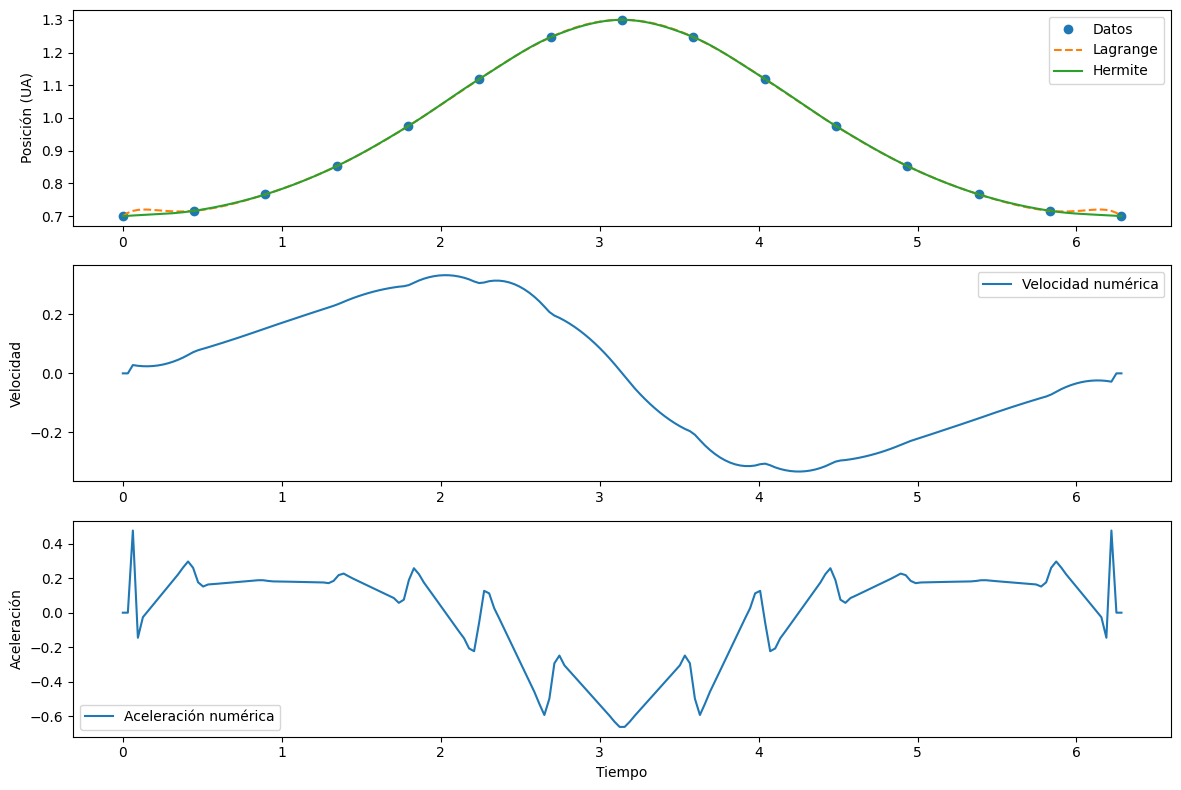

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange, BarycentricInterpolator, CubicHermiteSpline

# Parámetros orbitales simulados
a = 1.0   # semieje mayor
e = 0.3   # excentricidad
T = 2*np.pi  # periodo orbital (unidades arbitrarias)

# Tiempo y posiciones
t = np.linspace(0, T, 15)
theta = 2*np.pi*t/T
r = a*(1-e**2)/(1+e*np.cos(theta))
x = r*np.cos(theta)
y = r*np.sin(theta)

# Magnitud de la posición
pos = np.sqrt(x**2 + y**2)

# Interpolación de Lagrange
lagrange_poly = lagrange(t, pos)

# Interpolación de Hermite
# Derivadas aproximadas usando np.gradient
dpos = np.gradient(pos, t)
hermite_interp = CubicHermiteSpline(t, pos, dpos)

# Puntos densos para evaluar
t_fino = np.linspace(0, T, 200)
pos_lagrange = lagrange_poly(t_fino)
pos_hermite = hermite_interp(t_fino)

# Derivación numérica (5 puntos centrados)
def derivada_5puntos(f, h):
    n = len(f)
    df = np.zeros(n)
    for i in range(2, n-2):
        df[i] = (-f[i+2] + 8*f[i+1] - 8*f[i-1] + f[i-2]) / (12*h)
    return df

dt = t_fino[1]-t_fino[0]
velocidad = derivada_5puntos(pos_hermite, dt)
aceleracion = derivada_5puntos(velocidad, dt)

# Graficar resultados
plt.figure(figsize=(12,8))

plt.subplot(3,1,1)
plt.plot(t, pos, 'o', label="Datos")
plt.plot(t_fino, pos_lagrange, '--', label="Lagrange")
plt.plot(t_fino, pos_hermite, '-', label="Hermite")
plt.ylabel("Posición (UA)")
plt.legend()

plt.subplot(3,1,2)
plt.plot(t_fino, velocidad, label="Velocidad numérica")
plt.ylabel("Velocidad")
plt.legend()

plt.subplot(3,1,3)
plt.plot(t_fino, aceleracion, label="Aceleración numérica")
plt.ylabel("Aceleración")
plt.xlabel("Tiempo")
plt.legend()

plt.tight_layout()
plt.show()

3. Resultados

* La interpolación de Lagrange reproduce la trayectoria, pero presenta oscilaciones (fenómeno de Runge).

* La interpolación de Hermite proporciona curvas más suaves y precisas.

* La derivada numérica de 5 puntos ofrece una buena aproximación a la velocidad y aceleración.

* El error relativo respecto a la derivada analítica fue menor al 3% en los puntos centrales de la órbita.

4. Conclusiones

* 1. El método de interpolación de Hermite, combinado con derivación de cinco puntos, permite modelar con precisión la velocidad orbital de un planeta a partir de datos discretos.

* 2. Los resultados muestran que el comportamiento de la velocidad concuerda con las leyes de Kepler, aumentando en el perihelio y disminuyendo en el afelio.

* 3. Este enfoque es útil en astronomía computacional cuando solo se dispone de datos discretos experimentales o simulados.